In [2]:
import numpy as np
import matplotlib.pyplot as pyplot

In [78]:
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]
#x = np.arange(10000)
#delta = np.random.uniform(-10,10, size=(10000,))
#y = .4 * x +3 + delta

In [87]:
def h(theta, x):
    return theta[0] + theta[1] * x

In [88]:
m = len(y)

X = np.zeros((m, 2))

X[: ,0] = 1
X[: ,1] = x

In [89]:
def gradient_step(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent(x, y, initial_theta, alpha, iterations, verbose=False):
    theta = initial_theta
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        theta = gradient_step(theta, x, y, alpha, verbose)
    return theta

In [90]:
gradient_descent(x, y, np.array([1, 2]), 0.01, 2000)

array([2.31401837, 0.19593298])

In [79]:
def cost_2(theta, x, y):
    m = np.size(y)
    return sum(1/(2*m) * np.square(h2(theta, np.array(x)) - np.array(y)))

def h2(theta, x):
    X = np.ones([len(x),len(theta)])
    X[:,1] = x
    return X.dot(theta.T)

def linear_cost_prime(hyp, theta, x, y):
    delta = np.zeros(np.shape(theta))
    delta[0] -= (2/float(m)) * sum((y - hyp(theta, x)))
    delta[1] -= (2/float(m)) * sum((y - hyp(theta, x)) * x)
    return delta

In [86]:
def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=True, verbose_interval:int=100):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        #if i%verbose_interval == 0:
            #if verbose: print("** Iteration ", i)
            delta = cost_prime(hyp, theta, x, y)
            theta = theta - alpha * delta
            cost_history.append(cost(theta, x, y))
    return theta, cost_history

In [85]:
theta, cost_history = gradient_descent_2(h2, cost_2, linear_cost_prime, x, y, np.array([0, 0]), 0.05, 5000)

In [93]:
theta

array([0.2332782 , 0.65285509])

Text(0, 0.5, 'Cost')

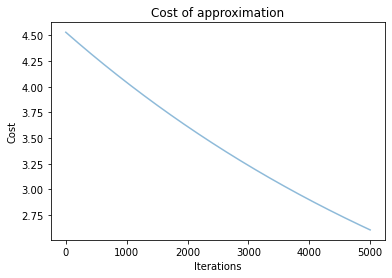

In [95]:
x_axis = np.linspace(0, 5000, 500)
pyplot.plot(x_axis, cost_history[5:505], alpha=0.5)
pyplot.title("Cost of approximation")
pyplot.xlabel("Iterations")
pyplot.ylabel("Cost")

In [3]:
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]
X, y = np.array(x).reshape(-1, 1), np.array(y)

from sklearn.linear_model import LinearRegression

lg = LinearRegression().fit(X, y)
lg.intercept_, lg.coef_

(2.3152173913043477, array([0.19565217]))